In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [19]:
x_train = pd.read_csv(
  "../data/processed/x_train.csv", index_col=0, dtype=str
).reset_index(drop=True)
x_test = pd.read_csv(
  "../data/processed/x_test.csv", index_col=0, dtype=str
).reset_index(drop=True)
y_train = pd.read_csv(
  "../data/processed/y_train.csv", index_col=0, dtype=float
).squeeze("columns").reset_index(drop=True)
y_test = pd.read_csv(
  "../data/processed/y_test.csv", index_col=0, dtype=float
).squeeze("columns").reset_index(drop=True)

In [21]:
def get_correct_types_x(df, numeric_cols):
    for col in ['deenergize_time', 'restoration_time']:
        df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S')
    for col in numeric_cols:
        df[col] = df[col].astype(float)
    return df
numeric_cols = [
    'hftd_tier', 'total_affected', 'residential_affected',
    'longitude', 'latitude', 'total_pop', 'median_age', 'median_income',
    'white_pct', 'tmin_d-5', 'tmax_d-5', 'wspd_d-5', 'tmin_d-4', 'tmax_d-4',
    'wspd_d-4', 'tmin_d-3', 'tmax_d-3', 'wspd_d-3', 'tmin_d-2', 'tmax_d-2',
    'wspd_d-2', 'tmin_d-1', 'tmax_d-1', 'wspd_d-1', 'day_in_year'
]
x_train = get_correct_types_x(x_train, numeric_cols)
x_test = get_correct_types_x(x_test, numeric_cols)
rel_x_train = x_train[numeric_cols]
rel_x_test = x_test[numeric_cols]

In [22]:
scaler = StandardScaler()
scaler.fit(rel_x_train)
scaled_train_x = scaler.transform(rel_x_train)
scaled_test_x = scaler.transform(rel_x_test)

In [24]:
best_preds = np.loadtxt("../data/predictions/rf_preds.csv")

In [25]:
resids = y_test - best_preds

In [26]:
# Take 10% most incorrect predictions
top10_pct_off = np.argsort(
  np.abs(np.array(resids))
)[-int(0.1 * len(resids))::][::-1]
extreme_resids = resids[top10_pct_off]
extreme_x = x_test.iloc[top10_pct_off, :]
extreme_y = y_test[top10_pct_off]

In [39]:
pd.merge(
  (
    extreme_x.zip_code.value_counts() /
    extreme_x.zip_code.value_counts().sum()
  ),
  (
    x_test.zip_code.value_counts() / 
    x_test.zip_code.value_counts().sum()
  ),
  how='inner', left_index=True, right_index=True
).sort_values('zip_code_x', ascending=False)

,zip_code_x,zip_code_y
95966,0.076923,0.035623
96069,0.051282,0.007634
95682,0.051282,0.007634
92356,0.051282,0.005089
93660,0.051282,0.005089
95667,0.051282,0.020356
94025,0.051282,0.007634
95441,0.051282,0.010178
95663,0.051282,0.005089
94558,0.025641,0.017812


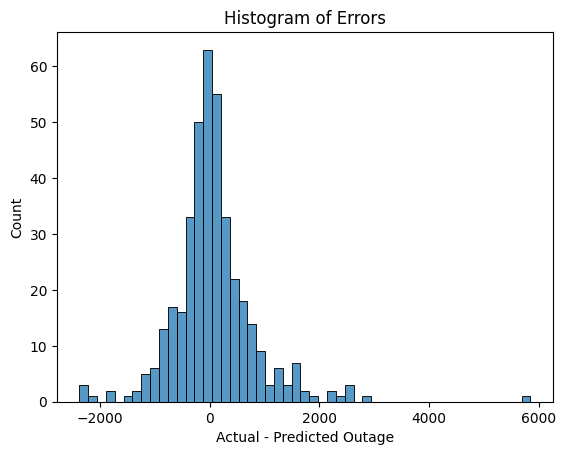

In [12]:
sns.histplot(resids)
plt.title("Histogram of Errors")
plt.xlabel("Actual - Predicted Outage")
plt.show()

In [33]:
def compare_extreme_vals(extreme, all, function):
  return (function(extreme) - function(all)) / function(all)

In [30]:
extreme_x

,circuit_name,deenergize_time,restoration_time,key_communities,hftd_tier,total_affected,residential_affected,zip_code,longitude,latitude,...,tmin_d-3,tmax_d-3,wspd_d-3,tmin_d-2,tmax_d-2,wspd_d-2,tmin_d-1,tmax_d-1,wspd_d-1,day_in_year
183,WYANDOTTE,2020-09-07 22:20:00,2020-09-13 08:52:00,OROVILLE,3.0,945.0,885.0,95966,-121.540947,39.491700,...,7.7,23.4,7.1,6.6,26.8,6.7,10.9,22.0,6.1,251.0
120,NAPA1112,2019-10-26 17:20:00,2019-10-31 11:56:00,NAPA,2.0,659.0,572.0,94559,-122.278915,38.295452,...,8.3,31.7,11.1,13.3,33.9,11.6,7.8,29.4,5.3,299.0
100,MENLO1103,2019-10-26 21:07:00,2019-10-30 14:50:00,"LA HONDA, LOS GATOS",2.0,304.0,235.0,94025,-122.202758,37.432808,...,12.8,29.4,7.6,17.8,31.7,9.4,15.0,30.6,9.4,299.0
370,DIAMONDSPRINGS1107,2019-10-26 17:41:00,2019-10-28 16:39:00,"PLACERVILLE, SHINGLE SPRINGS",3.0,1294.0,1230.0,95667,-120.825895,38.693412,...,19.0,30.0,19.1,16.0,30.0,17.8,8.9,30.6,1.8,299.0
202,DIAMONDSPRINGS1104,2019-10-26 17:23:00,2019-10-28 15:32:00,"EL DORADO, DIAMOND SPRINGS, PLACERVILLE",3.0,586.0,526.0,95667,-120.825895,38.693412,...,19.0,30.0,19.1,16.0,30.0,17.8,8.9,30.6,1.8,299.0
59,CORNING1101,2019-10-26 17:01:00,2019-10-30 12:29:00,"CORNING, FLOURNOY",2.0,881.0,795.0,96021,-122.187590,39.932432,...,21.1,30.6,27.7,13.3,30.6,16.9,10.6,31.1,8.6,299.0
253,PENRYN1103,2019-10-26 17:13:00,2019-10-28 18:47:00,"NEWCASTLE, PENRYN, AUBURN, LOOMIS, PILOT HILL",2.0,1461.0,1378.0,95663,-121.166560,38.844504,...,7.0,32.0,11.3,8.0,31.0,12.6,8.9,30.6,1.8,299.0
31,COTTONWOOD1101,2019-10-26 17:03:00,2019-10-30 15:35:00,"COTTONWOOD, RED BLUFF",2.0,868.0,805.0,92356,-116.861264,34.372554,...,10.6,36.1,4.1,18.9,32.2,15.0,16.1,34.4,14.3,299.0
241,TASSAJARA2113,2019-10-26 21:43:00,2019-10-28 10:16:00,SAN RAMON,3.0,445.0,430.0,94506,-121.907854,37.799945,...,12.8,28.9,8.2,13.9,30.6,11.6,11.1,32.8,4.0,299.0
214,VALLEY VIEW1106,2019-10-09 22:46:00,2019-10-10 16:15:00,"PINOLE, RICHMOND, EL SOBRANTE",3.0,4379.0,4258.0,94803,-122.278624,37.966134,...,6.1,30.6,6.8,10.0,30.0,6.0,8.3,25.0,8.3,282.0


In [49]:
for func in [np.mean, np.median]:
  for feature in ['day_in_year', 'median_age', 'wspd_d-1', 'white_pct', 'total_pop']:
    print(func, feature)
    print(compare_extreme_vals(extreme_x[feature], x_test[feature], func))

<function mean at 0x10beaae60> day_in_year
-7.131532589547817
<function mean at 0x10beaae60> median_age
-0.9879819925621476
<function mean at 0x10beaae60> wspd_d-1
-0.5366020747700126
<function mean at 0x10beaae60> white_pct
-0.014030682472117029
<function mean at 0x10beaae60> total_pop
-2720.1268349970633
<function median at 0x10c109870> day_in_year
0.0
<function median at 0x10c109870> median_age
0.19999999999999574
<function median at 0x10c109870> wspd_d-1
-1.6000000000000005
<function median at 0x10c109870> white_pct
-0.01772959069667035
<function median at 0x10c109870> total_pop
-5711.0


In [58]:
pd.concat([extreme_x.total_pop, extreme_resids], axis = 1).sort_values('total_pop', ascending=False)
np.median(extreme_resids)

1396.9600596491482